## First, lets get the data for Cairo, Egypt in a cleaned Dataframe

### Data could be found from the following link: https://www.citypopulation.de/php/egypt-greatercairo.php which is provided by citypopulation.de.
This data is not very accurate and some entries are different from Egyptian govornmental websites, however they are much easier to extract and are still reliable to the most part.

### Lets import BeautifulSoup and all its required libraries to read data form a webpage.
The required libraries are beautifulsoup4, lxml and requests.

In [13]:
pip install beautifulsoup4


The following command must be run outside of the IPython shell:

    $ pip install beautifulsoup4

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [8]:
pip install lxml


The following command must be run outside of the IPython shell:

    $ pip install lxml

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [9]:
pip install requests


The following command must be run outside of the IPython shell:

    $ pip install requests

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [1]:
import requests
import lxml
from bs4 import BeautifulSoup

### Lets start working.
Use BeautifulSoup to read the page's HTML and get the HTML of the table that contains all the information we need.

In [2]:
source = requests.get('https://www.citypopulation.de/php/egypt-greatercairo.php').text
soup = BeautifulSoup(source, 'lxml')

In [3]:
tableHTML = soup.find('table', class_ = 'data')


Each row in the table is in a 'tr' with class 'rname'.
Extract from each row the name of the neighbourhood, its area in sqKm, its population and the link that forwards you to the areas specific webpage.

In [4]:
neghbourhoods = []
pop = []
area = []
links = []

for row in tableHTML.find_all('tr', class_ = 'rname'):
    neghbourhoods.append(row.td.text)
    pop.append(row.find(class_ = 'rpop prio1').text)
    area.append(str(row.find('td')).split("\"")[3])
    links.append(str(row.find(class_ = 'sc').a).split('\"')[1])

Each link can be opened on its own in a BeautifulSoup variable and latitude and longitude of the neighbourhood can be extracted

In [5]:
lat = []
lng = []
for link in links:
    url = 'https://www.citypopulation.de' + link
    source = requests.get(url).text
    soup = BeautifulSoup(source, 'lxml')
    x = soup.find('div', id = 'admmap')
    lat.append(str(x.find_all('meta')[0]).split('\"')[1])
    lng.append(str(x.find_all('meta')[1]).split('\"')[1])
    print(link) #this print statement is to check where the execution has reached while it is being executed

/en/egypt/greatercairo/0104__15_māyū/
/en/egypt/greatercairo/0116__ābidīn/
/en/egypt/greatercairo/0114__ad_darb_al_aḥmar/
/en/egypt/greatercairo/2103__ad_duqqī/
/en/egypt/greatercairo/0134__ain_schams/
/en/egypt/greatercairo/2108__al_ahrām/
/en/egypt/greatercairo/2102__al_ajūzah/
/en/egypt/greatercairo/0131__al_amīriīah/
/en/egypt/greatercairo/0120__al_azbakiyah/
/en/egypt/greatercairo/2111__al_badrashayn/
/en/egypt/greatercairo/0107__al_basātīn/
/en/egypt/greatercairo/2110__al_ḥawāmidiyah/
/en/egypt/greatercairo/0122__al_jamāliyah/
/en/egypt/greatercairo/2104__al_jīzah/
/en/egypt/greatercairo/2109__al_jīzah/
/en/egypt/greatercairo/0111__al_khalīfah/
/en/egypt/greatercairo/1414__al_khānkah/
/en/egypt/greatercairo/1415__al_khānkah/
/en/egypt/greatercairo/1412__al_khuṣūṣ/
/en/egypt/greatercairo/0106__al_maādī/
/en/egypt/greatercairo/0135__al_marj/
/en/egypt/greatercairo/0103__al_maṣarah/
/en/egypt/greatercairo/0133__al_maṭariyah/
/en/egypt/greatercairo/0112__al_muqaṭṭam/
/en/egypt/greate

### Import pandas and make a DF of all the lists we've created. Add population Density to df.

In [6]:
import pandas as pd

In [7]:
neighbourhoodsDF = pd.DataFrame(list(zip(neghbourhoods, pop, area, links, lat, lng)), columns = ['Name', 'Population', 'Area/ sqkm', 'Link', 'Latitude', 'Longitude'] )
neighbourhoodsDF["Population"].replace(regex=True,inplace=True,to_replace=',',value=r'')
neighbourhoodsDF["Population"] = neighbourhoodsDF["Population"].astype(float)
neighbourhoodsDF["Area/ sqkm"] = neighbourhoodsDF["Area/ sqkm"].astype(float)
neighbourhoodsDF["Latitude"] = neighbourhoodsDF["Latitude"].astype(float)
neighbourhoodsDF["Longitude"] = neighbourhoodsDF["Longitude"].astype(float)
neighbourhoodsDF["Population Density"] = neighbourhoodsDF["Population"]/neighbourhoodsDF["Area/ sqkm"]
print(neighbourhoodsDF.shape)
neighbourhoodsDF.head(10)

(74, 7)


,Name,Population,Area/ sqkm,Link,Latitude,Longitude,Population Density
0,15 Māyū [15th of May City],96522.0,75.99,/en/egypt/greatercairo/0104__15_māyū/,29.833,31.384,1270.193447
1,'Ābidīn,41605.0,1.72,/en/egypt/greatercairo/0116__ābidīn/,30.044,31.243,24188.953488
2,Ad-Darb al-Aḥmar,60336.0,1.87,/en/egypt/greatercairo/0114__ad_darb_al_aḥmar/,30.041,31.258,32265.240642
3,Ad-Duqqī,73309.0,5.46,/en/egypt/greatercairo/2103__ad_duqqī/,30.039,31.205,13426.556777
4,'Ain Schams,633798.0,8.32,/en/egypt/greatercairo/0134__ain_schams/,30.122,31.327,76177.644231
5,Al-Ahrām,681383.0,17.96,/en/egypt/greatercairo/2108__al_ahrām/,29.994,31.138,37938.919822
6,Al-'Ajūzah,287818.0,7.35,/en/egypt/greatercairo/2102__al_ajūzah/,30.062,31.199,39158.911565
7,Al-Amīriīah,157378.0,3.80,/en/egypt/greatercairo/0131__al_amīriīah/,30.106,31.293,41415.263158
8,Al-Azbakiyah [Azbakeya],20393.0,1.33,/en/egypt/greatercairo/0120__al_azbakiyah/,30.057,31.245,15333.082707
9,Al-Badrashayn [Badrshein],563294.0,135.10,/en/egypt/greatercairo/2111__al_badrashayn/,29.823,31.258,4169.459660


In [8]:
neighbourhoodsDF.dtypes

Name                   object
Population            float64
Area/ sqkm            float64
Link                   object
Latitude              float64
Longitude             float64
Population Density    float64
dtype: object

Greater Cairo has 74 neighbourhoods

## Let's visualize what we have done this far using folium.

In [10]:
!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.9.11  |       hecc5488_0         144 KB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    openssl-1.1.1c             |       h516909a_0         2.1 MB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    certifi-2019.9.11          |           py36_0         147 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    altair-3.2.0               |           py36_0         770 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.3 MB

The following NEW packages will be 

In [11]:
# Look for the lat and lng of Cairo
latitude = 30.015
longitude = 31.313

In [12]:
# create map of Cairo using latitude and longitude values
map_cairo = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, pop, name, area, density in zip(neighbourhoodsDF['Latitude'], neighbourhoodsDF['Longitude'], neighbourhoodsDF['Population'], neighbourhoodsDF['Name'], neighbourhoodsDF['Area/ sqkm'], 
                                              neighbourhoodsDF['Population Density']):
    label = '{}, Area: {} sqKm, Population: {}, Population Density: {}'.format(name, area, pop, density)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_cairo)  
    
map_cairo

### you can also visualize the population density across cairo.
This can be done by building a chloropleth map. However, GeoJSON files are not available for free for egypt (or so i think). Therefore, the cirlce marker size can be changed according to the population density.

In [13]:
# create map of Cairo using latitude and longitude values
map_cairo = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, pop, name, area, density in zip(neighbourhoodsDF['Latitude'], neighbourhoodsDF['Longitude'], neighbourhoodsDF['Population'], neighbourhoodsDF['Name'], neighbourhoodsDF['Area/ sqkm'], 
                                              neighbourhoodsDF['Population Density']):
    label = '{}, Area: {} sqKm, Population: {}, Population Density: {}'.format(name, area, pop, density)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius= density/2000,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_cairo)  
    
map_cairo

In the above map, it is clear that population is high through out most of central cairo except for the areas around Az-Zamālik and Qaṣr an-Nīl. Areas faraway from central cairo have much less density.

### Now that we  have the demographics of all the main neighbourhoods in Cairo, it is time to find information about malls as well as something that indicates the income level.

#### Define Foursquare Credentials and Version

In [14]:
CLIENT_ID = 'WP53N4OBPVJNQZGWD0HLN53MDK2GIHWVVYGHPU0RKTUA4KO4' # your Foursquare ID
CLIENT_SECRET = 'F4QUBRVSVUXZ3CZAWKS34A2QQ0TLPGBSWNU1Z1W2N3IS3SWB' # your Foursquare Secret
VERSION = '20180604' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: WP53N4OBPVJNQZGWD0HLN53MDK2GIHWVVYGHPU0RKTUA4KO4
CLIENT_SECRET:F4QUBRVSVUXZ3CZAWKS34A2QQ0TLPGBSWNU1Z1W2N3IS3SWB


#### Let's first get all the banks in Cairo. Banks can show how wealthy a neighbourhood is.

In [15]:
import math #will be used to get the raduis of the search query

In [16]:
#This block outputs Number_Banks, which is a list of number of banks in each neighbourhood. The area of each neighbour considered to be a circle, thats why radius is calculated by math.sqrt(area/3.14)*1000
Number_Banks = []
LIMIT = 50
for lat, lng, area in zip(neighbourhoodsDF['Latitude'], neighbourhoodsDF['Longitude'], neighbourhoodsDF['Area/ sqkm']):
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET,  
            lat, 
            lng,
            VERSION,
            'bank',
            math.sqrt(area/3.14)*1000, 
            LIMIT)
    print(url)
    results = requests.get(url).json()
    Number_Banks.append(len(results['response']['venues']))

https://api.foursquare.com/v2/venues/search?client_id=WP53N4OBPVJNQZGWD0HLN53MDK2GIHWVVYGHPU0RKTUA4KO4&client_secret=F4QUBRVSVUXZ3CZAWKS34A2QQ0TLPGBSWNU1Z1W2N3IS3SWB&ll=29.833,31.384&v=20180604&query=bank&radius=4919.4142885789925&limit=50
https://api.foursquare.com/v2/venues/search?client_id=WP53N4OBPVJNQZGWD0HLN53MDK2GIHWVVYGHPU0RKTUA4KO4&client_secret=F4QUBRVSVUXZ3CZAWKS34A2QQ0TLPGBSWNU1Z1W2N3IS3SWB&ll=30.044,31.243&v=20180604&query=bank&radius=740.1153292811483&limit=50
https://api.foursquare.com/v2/venues/search?client_id=WP53N4OBPVJNQZGWD0HLN53MDK2GIHWVVYGHPU0RKTUA4KO4&client_secret=F4QUBRVSVUXZ3CZAWKS34A2QQ0TLPGBSWNU1Z1W2N3IS3SWB&ll=30.041,31.258&v=20180604&query=bank&radius=771.71328955376&limit=50
https://api.foursquare.com/v2/venues/search?client_id=WP53N4OBPVJNQZGWD0HLN53MDK2GIHWVVYGHPU0RKTUA4KO4&client_secret=F4QUBRVSVUXZ3CZAWKS34A2QQ0TLPGBSWNU1Z1W2N3IS3SWB&ll=30.039,31.205&v=20180604&query=bank&radius=1318.6559457207604&limit=50
https://api.foursquare.com/v2/venues/search?

In [17]:
neighbourhoodsDF['Number of Banks'] = Number_Banks
neighbourhoodsDF.head()

,Name,Population,Area/ sqkm,Link,Latitude,Longitude,Population Density,Number of Banks
0,15 Māyū [15th of May City],96522.0,75.99,/en/egypt/greatercairo/0104__15_māyū/,29.833,31.384,1270.193447,7
1,'Ābidīn,41605.0,1.72,/en/egypt/greatercairo/0116__ābidīn/,30.044,31.243,24188.953488,23
2,Ad-Darb al-Aḥmar,60336.0,1.87,/en/egypt/greatercairo/0114__ad_darb_al_aḥmar/,30.041,31.258,32265.240642,2
3,Ad-Duqqī,73309.0,5.46,/en/egypt/greatercairo/2103__ad_duqqī/,30.039,31.205,13426.556777,45
4,'Ain Schams,633798.0,8.32,/en/egypt/greatercairo/0134__ain_schams/,30.122,31.327,76177.644231,6


### Number of banks on its own does not accurately show how wealthy an area is.
The welthier the area, the more banks that will be present per capita. Thats because banks in welthier areas serve a smaller number than banks in poorer areas. So we will calculate tha Bank Density which is Banks devided by population

In [18]:
neighbourhoodsDF['Banks Density'] = neighbourhoodsDF['Number of Banks']/neighbourhoodsDF['Population']
neighbourhoodsDF.head()

,Name,Population,Area/ sqkm,Link,Latitude,Longitude,Population Density,Number of Banks,Banks Density
0,15 Māyū [15th of May City],96522.0,75.99,/en/egypt/greatercairo/0104__15_māyū/,29.833,31.384,1270.193447,7,0.000073
1,'Ābidīn,41605.0,1.72,/en/egypt/greatercairo/0116__ābidīn/,30.044,31.243,24188.953488,23,0.000553
2,Ad-Darb al-Aḥmar,60336.0,1.87,/en/egypt/greatercairo/0114__ad_darb_al_aḥmar/,30.041,31.258,32265.240642,2,0.000033
3,Ad-Duqqī,73309.0,5.46,/en/egypt/greatercairo/2103__ad_duqqī/,30.039,31.205,13426.556777,45,0.000614
4,'Ain Schams,633798.0,8.32,/en/egypt/greatercairo/0134__ain_schams/,30.122,31.327,76177.644231,6,0.000009


### Now lets get the number of malls near each neighbourhood
Using the same method used to get the banks, but this time the malls are saved in seperate df.

In [19]:
from pandas.io.json import json_normalize # this is used to change json to pandas

In [20]:
#This block outputs Number_Banks, which is a list of number of banks in each neighbourhood. The area of each neighbour considered to be a circle, thats why radius is calculated by math.sqrt(area/3.14)*1000
Number_Malls = []
Malls = pd.DataFrame(columns=['location.formattedAddress', 'location.lat', 'location.lng', 'name', 'Neighbourhood' ])
LIMIT = 50
for lat, lng, area, neighbourhood in zip(neighbourhoodsDF['Latitude'], neighbourhoodsDF['Longitude'], neighbourhoodsDF['Area/ sqkm'], neighbourhoodsDF['Name']):
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET,  
            lat, 
            lng,
            VERSION,
            'mall', #some malls are included in 'shopping centre' category. However using mall is simpler since most of the malls are called malls
            math.sqrt(area/3.14)*1000, 
            LIMIT)
    print(url)
    results = requests.get(url).json()
    Number_Malls.append(len(results['response']['venues']))
    venues = results['response']['venues']
    dataframe = json_normalize(venues)
    dataframe['Neighbourhood'] = neighbourhood
    #since some places might not have malls, the next few lines are done in a try block
    try:
        FilteredDf = dataframe[['location.formattedAddress', 'location.lat', 'location.lng', 'name', 'Neighbourhood' ]]
        Malls = Malls.append(FilteredDf)
    except:
        print('df empty, area with no malls')

https://api.foursquare.com/v2/venues/search?client_id=WP53N4OBPVJNQZGWD0HLN53MDK2GIHWVVYGHPU0RKTUA4KO4&client_secret=F4QUBRVSVUXZ3CZAWKS34A2QQ0TLPGBSWNU1Z1W2N3IS3SWB&ll=29.833,31.384&v=20180604&query=mall&radius=4919.4142885789925&limit=50
https://api.foursquare.com/v2/venues/search?client_id=WP53N4OBPVJNQZGWD0HLN53MDK2GIHWVVYGHPU0RKTUA4KO4&client_secret=F4QUBRVSVUXZ3CZAWKS34A2QQ0TLPGBSWNU1Z1W2N3IS3SWB&ll=30.044,31.243&v=20180604&query=mall&radius=740.1153292811483&limit=50
https://api.foursquare.com/v2/venues/search?client_id=WP53N4OBPVJNQZGWD0HLN53MDK2GIHWVVYGHPU0RKTUA4KO4&client_secret=F4QUBRVSVUXZ3CZAWKS34A2QQ0TLPGBSWNU1Z1W2N3IS3SWB&ll=30.041,31.258&v=20180604&query=mall&radius=771.71328955376&limit=50
df empty, area with no malls
https://api.foursquare.com/v2/venues/search?client_id=WP53N4OBPVJNQZGWD0HLN53MDK2GIHWVVYGHPU0RKTUA4KO4&client_secret=F4QUBRVSVUXZ3CZAWKS34A2QQ0TLPGBSWNU1Z1W2N3IS3SWB&ll=30.039,31.205&v=20180604&query=mall&radius=1318.6559457207604&limit=50
https://api.fou

Clean the malls dataframe

In [21]:
# because of the assumption that all neighbourhoods are circular. some duplicates might occur
Malls.drop_duplicates(subset ="name", keep = False, inplace = True)
Malls.rename(columns={"location.formattedAddress": "Address", "location.lat": "Latitude", "location.lng": "Longitude", "name": "Name"}, inplace = True)
Malls.reset_index(inplace = True, drop = True)
print(Malls.shape)
Malls.head()

(208, 5)


,Address,Latitude,Longitude,Name,Neighbourhood
0,"[30 Talaat Harb St, وسط البلد, القاهرة, مصر]",30.050162,31.239915,Talaat Harb Mall (مول طلعت حرب),'Ābidīn
1,"[20 Youssef El Gendy St (El Bustan St), باب ال...",30.045942,31.239892,El Nekhely (النخيلي),'Ābidīn
2,"[Gawad Hosni St (Sherif St), عابدين, القاهرة, ...",30.047894,31.242650,El Bustan Cafe (قهوة البستان),'Ābidīn
3,[مصر],30.119197,31.321550,Grand Mall - Elna'am,'Ain Schams
4,"[El Haram St, Al Haram, Muḩāfaz̧at al Jīzah, M...",29.988053,31.145066,Plaza Mall (بلازا مول),Al-Ahrām


In [22]:
# Add the number of malls to the neighbourhoodDF
neighbourhoodsDF['Number of Malls'] = Number_Malls
neighbourhoodsDF.head(10)

,Name,Population,Area/ sqkm,Link,Latitude,Longitude,Population Density,Number of Banks,Banks Density,Number of Malls
0,15 Māyū [15th of May City],96522.0,75.99,/en/egypt/greatercairo/0104__15_māyū/,29.833,31.384,1270.193447,7,0.000073,1
1,'Ābidīn,41605.0,1.72,/en/egypt/greatercairo/0116__ābidīn/,30.044,31.243,24188.953488,23,0.000553,5
2,Ad-Darb al-Aḥmar,60336.0,1.87,/en/egypt/greatercairo/0114__ad_darb_al_aḥmar/,30.041,31.258,32265.240642,2,0.000033,0
3,Ad-Duqqī,73309.0,5.46,/en/egypt/greatercairo/2103__ad_duqqī/,30.039,31.205,13426.556777,45,0.000614,1
4,'Ain Schams,633798.0,8.32,/en/egypt/greatercairo/0134__ain_schams/,30.122,31.327,76177.644231,6,0.000009,2
5,Al-Ahrām,681383.0,17.96,/en/egypt/greatercairo/2108__al_ahrām/,29.994,31.138,37938.919822,12,0.000018,5
6,Al-'Ajūzah,287818.0,7.35,/en/egypt/greatercairo/2102__al_ajūzah/,30.062,31.199,39158.911565,46,0.000160,8
7,Al-Amīriīah,157378.0,3.80,/en/egypt/greatercairo/0131__al_amīriīah/,30.106,31.293,41415.263158,1,0.000006,1
8,Al-Azbakiyah [Azbakeya],20393.0,1.33,/en/egypt/greatercairo/0120__al_azbakiyah/,30.057,31.245,15333.082707,14,0.000687,1
9,Al-Badrashayn [Badrshein],563294.0,135.10,/en/egypt/greatercairo/2111__al_badrashayn/,29.823,31.258,4169.459660,2,0.000004,1


### Let's Visualize the distribution of malls in Cairo using Folium

In [23]:
# Look for the lat and lng of Cairo
latitude = 30.015
longitude = 31.313
# create map of Cairo using latitude and longitude values
map_malls = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, neighbourhood, name in zip(Malls['Latitude'], Malls['Longitude'], Malls['Neighbourhood'], Malls['Name']):
    
    label = '{}, {}'.format(name, neighbourhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_malls)  
    
map_malls

## Let's check for trends in population density, banks density and number of malls.
Use matplotlib library

In [89]:
# we are using the inline backend
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

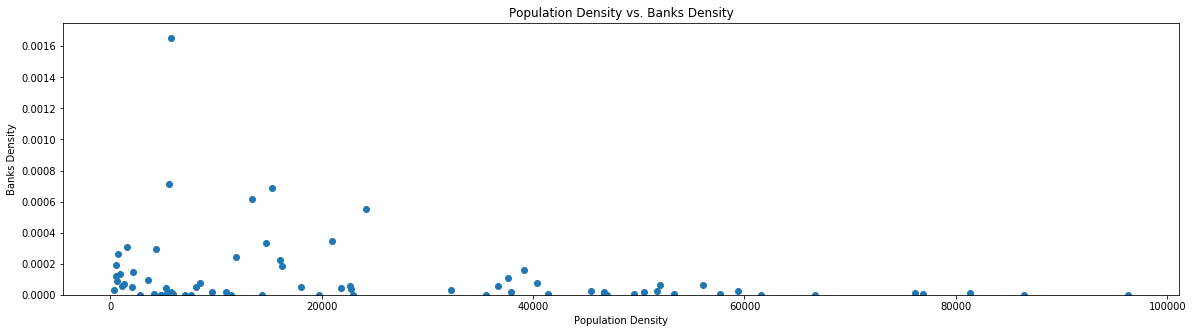

In [63]:
plt.figure(figsize=(20,5))
plt.ylim(0,0.00175)
plt.title('Population Density vs. Banks Density')
plt.ylabel('Banks Density')
plt.xlabel('Population Density')
plt.scatter(neighbourhoodsDF['Population Density'], neighbourhoodsDF['Banks Density'])

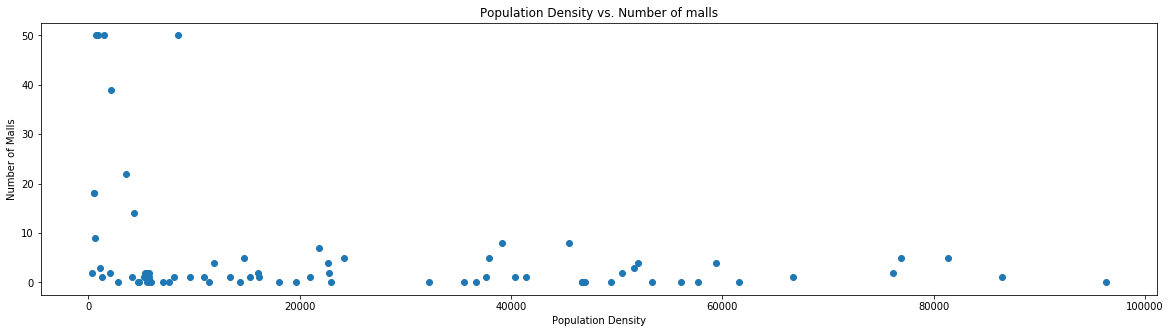

In [64]:
plt.figure(figsize=(20,5))
plt.title('Population Density vs. Number of malls')
plt.ylabel('Number of Malls')
plt.xlabel('Population Density')
plt.scatter(neighbourhoodsDF['Population Density'], neighbourhoodsDF['Number of Malls'])

From the previous plots, it is apparent that population density is corelated with both number of malls in the area and banks density. The lower the population density, the higher the banks density and number of malls in the area. Now let's check for pearson correlation.

In [71]:
from scipy.stats import pearsonr

In [75]:
cor = pearsonr(neighbourhoodsDF['Population Density'], neighbourhoodsDF['Number of Malls'])
print('Correlation between population density and number of malls is ' + str(cor[0]))
cor = pearsonr(neighbourhoodsDF['Population Density'], neighbourhoodsDF['Banks Density'])
print('Correlation between population density and banks density is ' + str(cor[0]))

Correlation between population density and number of malls is -0.2911016155620632
Correlation between population density and banks density is -0.24923281466862976


Both variables show a negative correlation apparent
### Now lets try to cluster similar neighbourhoods together

In [86]:
# first lets normalize the data
from sklearn import preprocessing
import numpy as np

In [80]:
clusteringDF = neighbourhoodsDF[['Population Density', 'Banks Density', 'Number of Malls']]
normalized_X = preprocessing.normalize(clusteringDF)
normalized_X[0:10]

array([[9.99999690e-01, 5.70954796e-08, 7.87281412e-04],
       [9.99999979e-01, 2.28541578e-08, 2.06705920e-04],
       [1.00000000e+00, 1.02735035e-09, 0.00000000e+00],
       [9.99999997e-01, 4.57183517e-08, 7.44792588e-05],
       [1.00000000e+00, 1.24271874e-10, 2.62544217e-05],
       [9.99999991e-01, 4.64199840e-10, 1.31790783e-04],
       [9.99999979e-01, 4.08140094e-09, 2.04295766e-04],
       [1.00000000e+00, 1.53424795e-10, 2.41456874e-05],
       [9.99999998e-01, 4.47731281e-08, 6.52184572e-05],
       [9.99999971e-01, 8.51559663e-10, 2.39839224e-04]])

In [126]:
#cluster neighbourhoods using Kmeans clusterring

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0).fit(normalized_X)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

### Visualize the positions of clusters

In [127]:
neighbourhoodsDF['Cluster'] = kmeans.labels_
# Look for the lat and lng of Cairo
latitude = 30.015
longitude = 31.313

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(3)
ys = [i + x + (i*x)**2 for i in range(3)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(neighbourhoodsDF['Latitude'], neighbourhoodsDF['Longitude'], neighbourhoodsDF['Name'], neighbourhoodsDF['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

It is apparent that clusters 1 and 2 are on the newer parts of the city. Let's call them outskirts. Lets try to find out what is the difference between the 3 clusters

In [115]:
neighbourhoodsDF.loc[neighbourhoodsDF.Cluster > 0, 'Outskirts'] = 1
neighbourhoodsDF.loc[neighbourhoodsDF.Cluster == 0, 'Outskirts'] = 0

### Lets devide the df we have on whether the neighbourhood is outskirt or not.

In [117]:
neighbourhoodsOut = neighbourhoodsDF.loc[neighbourhoodsDF.Outskirts == 1]
neighbourhoodsNOut = neighbourhoodsDF.loc[neighbourhoodsDF.Outskirts == 0]

In [123]:
print('The mean population density of outskirts is ',neighbourhoodsOut['Population Density'].mean(),'while the mean population density of the not outskirts is ',neighbourhoodsNOut['Population Density'].mean())
print('The mean banks density of outskirts is ',neighbourhoodsOut['Banks Density'].mean(),'while the mean banks density of the not outskirts is ',neighbourhoodsNOut['Banks Density'].mean())


The mean population density of outskirts is  1061.2161632523605 while the mean population density of the not outskirts is  27582.16722571647
The mean banks density of outskirts is  0.00019400665533550032 while the mean banks density of the not outskirts is  0.00010882332013127793


It is clear that outskirts have a much less population density, of just 1061 /sq km caompared to a whooping 27,580 in places inside the city.
Also the bank density is double than that of the places inside the city.
Outskirts are generally less crowded and more expensive.

### Let's check the histogram of the data frames we have to check the distribution of it.

(array([3., 1., 0., 1., 0., 1.]),
 array([ 502.87096774,  781.38907176, 1059.90717577, 1338.42527979,
        1616.94338381, 1895.46148782, 2173.97959184]),
 <a list of 6 Patch objects>)

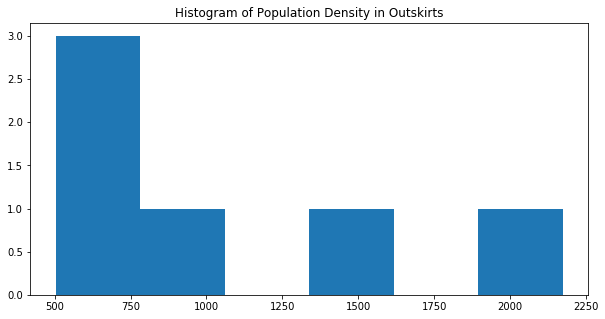

In [137]:
plt.figure(figsize = (10,5))
plt.title('Histogram of Population Density in Outskirts')
plt.hist(neighbourhoodsOut['Population Density'], bins = 6)

(array([3., 0., 1., 0., 1., 1.]),
 array([0.00012218, 0.00015296, 0.00018375, 0.00021453, 0.00024532,
        0.0002761 , 0.00030689]),
 <a list of 6 Patch objects>)

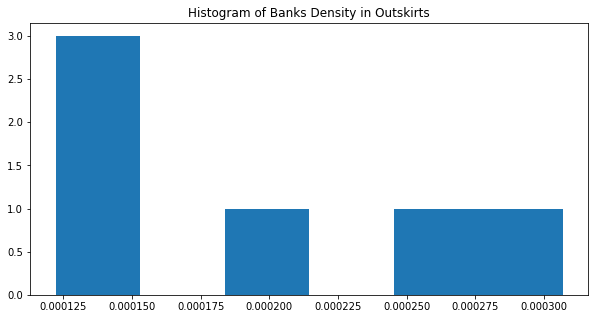

In [136]:
plt.figure(figsize = (10,5))
plt.title('Histogram of Banks Density in Outskirts')
plt.hist(neighbourhoodsOut['Banks Density'], bins = 6)

(array([33.,  9., 11.,  9.,  3.,  3.]),
 array([  311.8647343 , 16311.33784105, 32310.81094779, 48310.28405454,
        64309.75716129, 80309.23026803, 96308.70337478]),
 <a list of 6 Patch objects>)

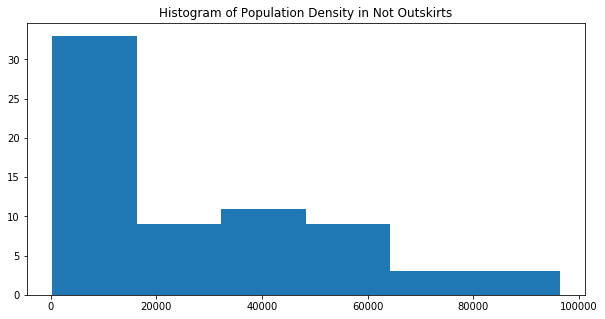

In [138]:
plt.figure(figsize = (10,5))
plt.title('Histogram of Population Density in Not Outskirts')
plt.hist(neighbourhoodsNOut['Population Density'], bins = 6)

(array([60.,  3.,  4.,  0.,  0.,  1.]),
 array([0.        , 0.0002752 , 0.00055041, 0.00082561, 0.00110082,
        0.00137602, 0.00165122]),
 <a list of 6 Patch objects>)

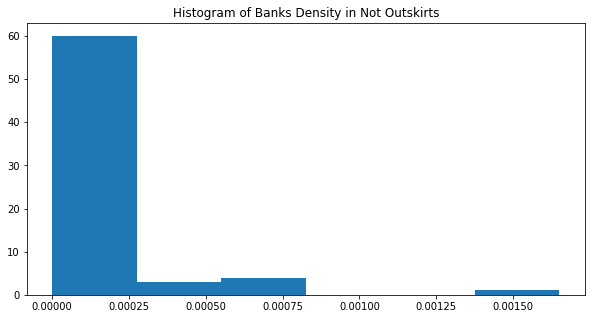

In [139]:
plt.figure(figsize = (10,5))
plt.title('Histogram of Banks Density in Not Outskirts')
plt.hist(neighbourhoodsNOut['Banks Density'], bins = 6)

### Again from the histograms, outskirts are much less crowded and have a higher banks density. Not outskirts histogram of banks density shows that some areas have very low banks density while some still have high. Lets try to cluster them again.

In [156]:
clusteringDF = neighbourhoodsNOut[['Population Density','Banks Density', 'Number of Malls']]
normalized_X = preprocessing.normalize(clusteringDF)
normalized_X[0:10]
kmeans = KMeans(n_clusters=3, random_state=0).fit(normalized_X)

# check cluster labels generated for each row in the dataframe
neighbourhoodsNOut['Cluster'] = kmeans.labels_

neighbourhoodsNOut0 = neighbourhoodsDF.loc[neighbourhoodsDF.Cluster == 0]
neighbourhoodsNOut1 = neighbourhoodsDF.loc[neighbourhoodsDF.Cluster == 1]
neighbourhoodsNOut2 = neighbourhoodsDF.loc[neighbourhoodsDF.Cluster == 2]

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(array([33.,  9., 11.,  9.,  3.,  3.]),
 array([  311.8647343 , 16311.33784105, 32310.81094779, 48310.28405454,
        64309.75716129, 80309.23026803, 96308.70337478]),
 <a list of 6 Patch objects>)

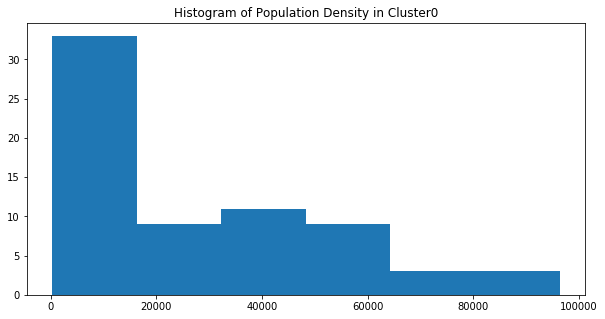

In [162]:
plt.figure(figsize = (10,5))
plt.title('Histogram of Population Density in Cluster0')
plt.hist(neighbourhoodsNOut0['Population Density'], bins = 6)

(array([1., 0., 0., 0., 0., 1.]),
 array([751.56890796, 774.78927873, 798.0096495 , 821.23002027,
        844.45039104, 867.6707618 , 890.89113257]),
 <a list of 6 Patch objects>)

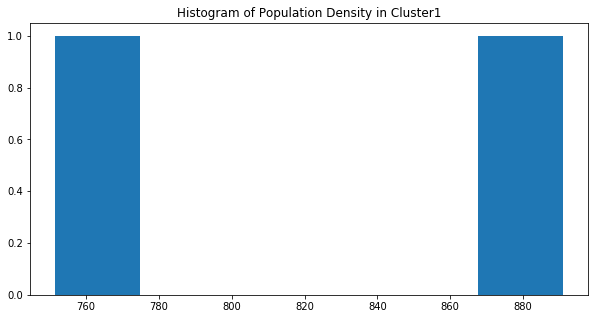

In [163]:
plt.figure(figsize = (10,5))
plt.title('Histogram of Population Density in Cluster1')
plt.hist(neighbourhoodsNOut1['Population Density'], bins = 6)

(array([2., 0., 0., 1., 0., 1.]),
 array([ 502.87096774,  781.38907176, 1059.90717577, 1338.42527979,
        1616.94338381, 1895.46148782, 2173.97959184]),
 <a list of 6 Patch objects>)

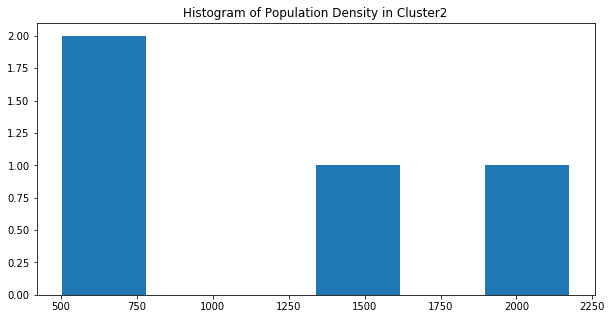

In [164]:
plt.figure(figsize = (10,5))
plt.title('Histogram of Population Density in Cluster2')
plt.hist(neighbourhoodsNOut2['Population Density'], bins = 6)

(array([60.,  3.,  4.,  0.,  0.,  1.]),
 array([0.        , 0.0002752 , 0.00055041, 0.00082561, 0.00110082,
        0.00137602, 0.00165122]),
 <a list of 6 Patch objects>)

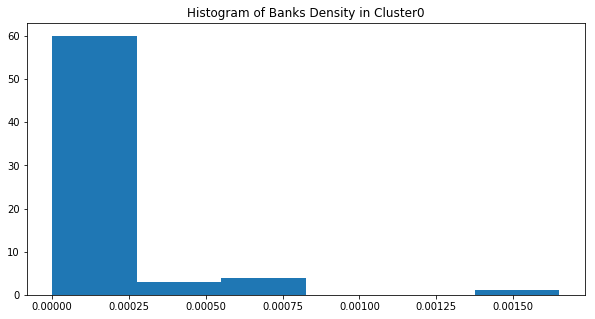

In [165]:
plt.figure(figsize = (10,5))
plt.title('Histogram of Banks Density in Cluster0')
plt.hist(neighbourhoodsNOut0['Banks Density'], bins = 6)

(array([1., 0., 0., 0., 0., 1.]),
 array([0.00013304, 0.00015423, 0.00017541, 0.00019659, 0.00021778,
        0.00023896, 0.00026015]),
 <a list of 6 Patch objects>)

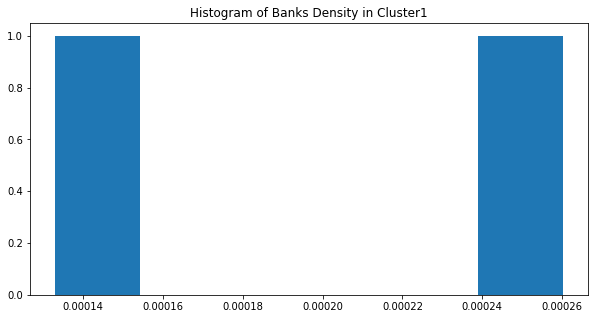

In [166]:
plt.figure(figsize = (10,5))
plt.title('Histogram of Banks Density in Cluster1')
plt.hist(neighbourhoodsNOut1['Banks Density'], bins = 6)

(array([2., 0., 1., 0., 0., 1.]),
 array([0.00012218, 0.00015296, 0.00018375, 0.00021453, 0.00024532,
        0.0002761 , 0.00030689]),
 <a list of 6 Patch objects>)

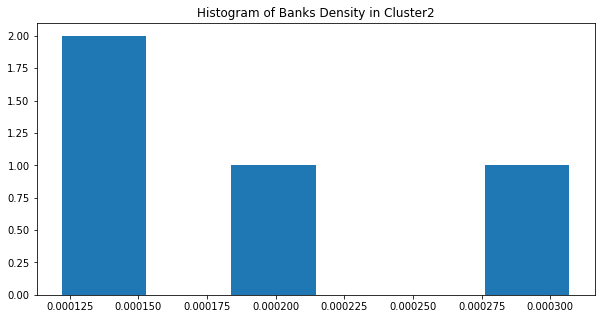

In [167]:
plt.figure(figsize = (10,5))
plt.title('Histogram of Banks Density in Cluster2')
plt.hist(neighbourhoodsNOut2['Banks Density'], bins = 6)

Cluster 0 has very high population density as well as higher banks density than cluster 1 and 2. Cluster 1 and 2 have very low banks density. This means that these 3 clusters will not be suitable places for a mall. They are either very crowded and there will not be easy access to the mall or do not have high salaries, which will make the malls not profitable.

### The best places to build a mall are included in the df neighbourhoodsOut

In [169]:
neighbourhoodsOut

,Name,Population,Area/ sqkm,Link,Latitude,Longitude,Population Density,Number of Banks,Banks Density,Number of Malls,Cluster,Outskirts
25,Al-Qāhirah al-Jadīdah 1 [New Cairo],140117.0,91.37,/en/egypt/greatercairo/0142__al_qāhirah_al_jad...,30.028,31.466,1533.512094,43,0.000307,50,2,1.0
26,Al-Qāhirah al-Jadīdah 2 [New Cairo],93534.0,186.00,/en/egypt/greatercairo/0143__al_qāhirah_al_jad...,30.062,31.575,502.870968,18,0.000192,18,2,1.0
35,Ash-Shaykh Zāyid [Sheikh Zayed City],93742.0,43.12,/en/egypt/greatercairo/2119__ash_shaykh_zāyid/,30.047,30.980,2173.979592,14,0.000149,39,2,1.0
36,Ash-Shurūq,90033.0,175.00,/en/egypt/greatercairo/0145__ash_shurūq/,30.129,31.528,514.474286,11,0.000122,18,2,1.0
61,Madīnat Sittah Uktūbar 2 [6th of October City],202945.0,227.80,/en/egypt/greatercairo/2121__madīnat_sittah_uk...,29.931,30.886,890.891133,27,0.000133,50,1,1.0
62,Madīnat Sittah Uktūbar 1 & 3 [6th of October C...,157604.0,209.70,/en/egypt/greatercairo/2120__madīnat_sittah_uk...,29.967,31.017,751.568908,41,0.000260,50,1,1.0
